In [355]:
import numpy as np
import struct
import matplotlib.pyplot as plt
import torch
import math

In [356]:
#Extracting the training data images
with open('archive/train-images-idx3-ubyte/train-images-idx3-ubyte', 'rb') as file:
    magic, size = struct.unpack(">II", file.read(8))
    rows, cols = struct.unpack(">II", file.read(8))
    train_data = np.fromfile(file, dtype=np.dtype(np.uint8).newbyteorder('>'))
    train_data = torch.from_numpy(train_data)
    train_data = train_data.reshape((size, rows, cols))

#Extracting the training labesls
with open('archive/train-labels-idx1-ubyte/train-labels-idx1-ubyte', 'rb') as file:
    magic, size = struct.unpack(">II", file.read(8))
    train_label = np.fromfile(file, dtype=np.dtype(np.uint8).newbyteorder('>'))
    train_label = torch.from_numpy(train_label)
    train_label = train_label.reshape((size, 1))

#Extracting the testing data images
with open('archive/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte', 'rb') as file:
    magic, size = struct.unpack(">II", file.read(8))
    rows, cols = struct.unpack(">II", file.read(8))
    test_data = np.fromfile(file, dtype=np.dtype(np.uint8).newbyteorder('>'))
    test_data = torch.from_numpy(test_data)
    test_data = test_data.reshape((size, rows, cols))

#Extracting the testing labels
with open('archive/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte', 'rb') as file:
    magic, size = struct.unpack(">II", file.read(8))
    test_label = np.fromfile(file, dtype=np.dtype(np.uint8).newbyteorder('>'))
    test_label = torch.from_numpy(test_label)
    test_label = test_label.reshape((size, 1))
    

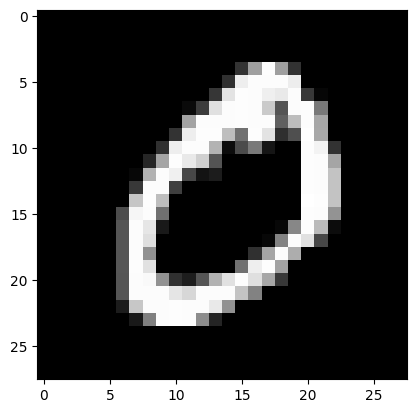

In [357]:
#Ploting the images
# print(train_label[15,:])
#These points are being plotted to form a graph
plt.imshow(train_data[1,:,:], cmap='gray')
plt.show()

In [358]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

In [359]:
def relu(x):
    return torch.maximum(torch.tensor(0.0), x)

In [360]:
# The shapes of the data
print(f'The training data shape is: {train_data.shape} with the shape of the labels being {train_label.shape}')
print(f'The testing data shape is: {test_data.shape} with the shape of the labels being {test_label.shape}')

The training data shape is: torch.Size([60000, 28, 28]) with the shape of the labels being torch.Size([60000, 1])
The testing data shape is: torch.Size([10000, 28, 28]) with the shape of the labels being torch.Size([10000, 1])


In [361]:
# We have to reshape the data into a 2d vector where each image is represented by a single vector of size 28 x 28
# Each image is made up of 28 x 28 pixels
# How will we strech to a single vector

# Let's convert to tensor, so that we can use pytorch
X_train = train_data.view(train_data.shape[0], train_data.shape[1] ** 2)
print(train_label.dtype)
y_train = torch.nn.functional.one_hot(train_label.long(), num_classes = 10)
Y_train = y_train.view(60000, 10)
print(Y_train.dtype)
X_test = test_data.view(test_data.shape[0], test_data.shape[1] ** 2)
# X_train.shape

torch.uint8
torch.int64


In [362]:
# Let's try to normalise the data as it is in the range 255
X_train = X_train.float()/255
X_test = X_test.float()/255

#Spliting X_train and X_test
# X_train[0, :]

In [363]:
def initial_params(layer_dim):

    p = []

    for i in range(1, len(layer_dim)):

        p.append(torch.rand((layer_dim[i], layer_dim[i-1])) * 0.01)
        p.append(torch.zeros(layer_dim[i], 1))

    # print(p)
    return p

In [364]:
def forward_prop(X, p):

    #For the first layer -
    z1 = torch.mm(p[0], X.T) + p[1] # Matrix multiplication instead of element-wise
    # print("The value of z1 after changing w are: ", z1[0,:])
    a1 = sigmoid(z1)

    #For the second layer -
    z2 = torch.mm(p[2], a1) + p[3]
    # print("The size of z2 is: ", z2.shape)
    a2 = sigmoid(z2)

    # #For the third layer -
    z3 = torch.mm(p[4], a2) + p[5]
    # print("The size of z3 is: ", z3.shape)
    a3 = relu(z3)

    return a3

In [365]:
def compute_cost(a3, Y):

    m = Y.shape[0]
    logprobs = torch.mul(-torch.log(a3), Y.T) + torch.mul(-torch.log(1 - a3), (1 - Y).T)
    loss = 1. / m * torch.nansum(logprobs)

    return loss
    

In [369]:
# Let's define the number of layers and the size of each layer
# The output layer has 10 neurons as the output is a number in the range 0-9
layer_dim = [X_train.shape[1], 20, 20, 10] 
parameters = initial_params(layer_dim)

for p in parameters:
    p.requires_grad = True
    p.grad = None

costs = []
ite = []

The cost is:  3.3651340007781982
The cost is:  3.3808906078338623
The cost is:  3.3904075622558594
The cost is:  3.3923635482788086
The cost is:  3.3866021633148193
The cost is:  3.3740718364715576
The cost is:  3.3566839694976807
The cost is:  3.3370680809020996
The cost is:  3.3182454109191895
The cost is:  3.3033270835876465


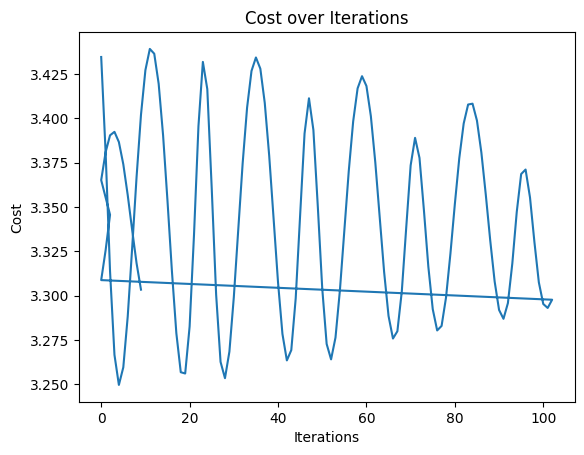

In [372]:
for i in range(10):

    yest = forward_prop(X_train, parameters)

    # print(f"The value of yest for {i} is: {yest}")

    cost = compute_cost(yest, Y_train)
    costs.append(cost.item())
    ite.append(i)

    cost.backward()
    print("The cost is: ", cost.item())

    for p in parameters:
        # print("The p.data for parameter p is: ", p.grad)
        p.data += -0.001 * p.grad

plt.plot(ite, costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')
plt.show()

In [347]:
#Let's try to test the training inputs and outputs
yest = forward_prop(X_train[:10], parameters)
y = torch.multinomial(yest, 1)
print(y)
print("The actual Y values are: ", train_label[:10])

RuntimeError: probability tensor contains either `inf`, `nan` or element < 0